In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
import tensorflow_recommenders as tfrs

# Preprocessing


## Data Place


In [2]:
rating = pd.read_csv("archive (1)/tourism_rating.csv")
place = pd.read_csv("archive (1)/Dataset_NusaGo - en-ver (1).csv")
user = pd.read_csv("archive (1)/user.csv")

In [4]:
# Merge dataframes
merged_df = pd.merge(rating, place, how="inner", on="Place_Id")
merged_df = pd.merge(merged_df, user, how="inner", on="User_Id")
merged_df = merged_df.drop(["picture", "category", "Location", "Age"], axis=1)

# Convert "User_Id" and "Place_Id" to strings
merged_df["User_Id"] = merged_df["User_Id"].astype(str)
merged_df["Place_Id"] = merged_df["Place_Id"].astype(str)

In [5]:
# Split the data
training_size = 0.8
rating_merge_place = merged_df.sample(frac=1).reset_index(drop=True)
train_df, test_df = train_test_split(rating_merge_place, test_size=1 - training_size)

In [37]:
train_df

,User_Id,Place_Id,Place_Ratings,Place_name,city,place_description,rating,label
1715,262,54,4,Enting-Enting Gepuk Cap Klenteng & 2 Hoolo,Salatiga,"Enting-enting gepuk, stamped ""Klenteng and 2 H...",5.0,culinary tour
1724,37,63,5,Surakarta Hadiningrat Palace,Surakarta,A Javanese kingdom that ruled several centurie...,4.6,City Tour
807,241,45,3,Sambel Tumpang Pecel Bu Kis,Surakarta,Sambel Tumpang is one of Solo's culinary delig...,4.4,culinary tour
1102,165,20,5,Progo rafting,Magelang,Rafting on the lower Progo River is the most e...,4.5,water activities
166,6,64,5,Solo Safari,Surakarta,"Solo Safari, formerly known as Taman Satwa Tar...",4.0,City Tour
...,...,...,...,...,...,...,...,...
205,171,4,1,Sri Gethuk Waterfalls,Yogyakarta,Sri Gethuk Waterfall is one of the natural att...,4.2,water activities
634,297,15,1,Sembukan Beach,Wonogiri,"Sembukan Beach is located in Sembukan Village,...",4.5,water activities
864,137,36,3,Mount Andong,Magelang,Mount Andong is a mountain in Magelang Regency...,4.7,hiking
993,7,13,2,Parang Ijo Waterfalls,Karanganyar,Parang Ijo Waterfall is located at the foot of...,4.3,water activities


Epoch 1/5
23/23 [==============================] - 2s 3ms/step - root_mean_squared_error: nan - loss: -6.8696e-07 - regularization_loss: 0.0000e+00 - total_loss: -6.8696e-07
Epoch 2/5
23/23 [==============================] - 0s 3ms/step - root_mean_squared_error: 0.2625 - loss: -1.2983e-06 - regularization_loss: 0.0000e+00 - total_loss: -1.2983e-06
Epoch 3/5
23/23 [==============================] - 0s 3ms/step - root_mean_squared_error: 0.1030 - loss: -1.9103e-06 - regularization_loss: 0.0000e+00 - total_loss: -1.9103e-06
Epoch 4/5
23/23 [==============================] - 0s 3ms/step - root_mean_squared_error: 0.0862 - loss: -2.5232e-06 - regularization_loss: 0.0000e+00 - total_loss: -2.5232e-06
Epoch 5/5
23/23 [==============================] - 0s 3ms/step - root_mean_squared_error: 0.0794 - loss: -3.1375e-06 - regularization_loss: 0.0000e+00 - total_loss: -3.1375e-06
INFO:tensorflow:Assets written to: recommender_model_savedmodel\assets


INFO:tensorflow:Assets written to: recommender_model_savedmodel\assets


6/6 [==============================] - 1s 3ms/step - root_mean_squared_error: 0.2454 - loss: -8.0775e-06 - regularization_loss: 0.0000e+00 - total_loss: -8.0775e-06
Epoch 1/5
23/23 [==============================] - 0s 3ms/step - root_mean_squared_error: 0.0756 - loss: -3.7537e-06 - regularization_loss: 0.0000e+00 - total_loss: -3.7537e-06
Epoch 2/5
23/23 [==============================] - 0s 3ms/step - root_mean_squared_error: 0.0733 - loss: -4.3722e-06 - regularization_loss: 0.0000e+00 - total_loss: -4.3722e-06
Epoch 3/5
23/23 [==============================] - 0s 4ms/step - root_mean_squared_error: 0.0716 - loss: -4.9934e-06 - regularization_loss: 0.0000e+00 - total_loss: -4.9934e-06
Epoch 4/5
23/23 [==============================] - 0s 4ms/step - root_mean_squared_error: 0.0705 - loss: -5.6179e-06 - regularization_loss: 0.0000e+00 - total_loss: -5.6179e-06
Epoch 5/5
23/23 [==============================] - 0s 4ms/step - root_mean_squared_error: 0.0696 - loss: -6.2460e-06 - regulari

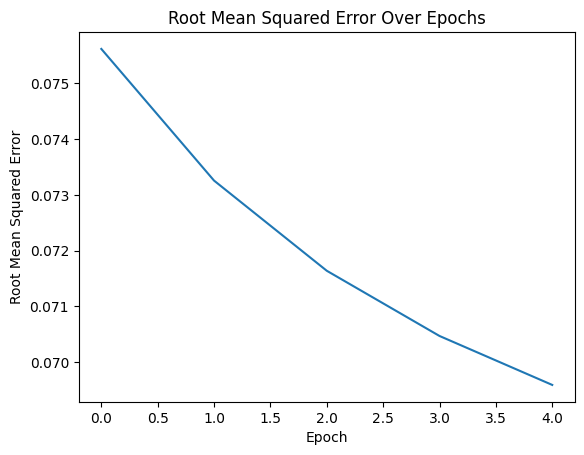

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
import tensorflow_recommenders as tfrs
from typing import Dict, Text

# Load data
rating = pd.read_csv("archive (1)/tourism_rating.csv")
place = pd.read_csv("archive (1)/Dataset_NusaGo - en-ver (1).csv")
user = pd.read_csv("archive (1)/user.csv")

# Merge dataframes
merged_df = pd.merge(rating, place, how="inner", on="Place_Id")
merged_df = pd.merge(merged_df, user, how="inner", on="User_Id")
merged_df = merged_df.drop(["picture", "category", "Location", "Age"], axis=1)

# Convert "User_Id" and "Place_Id" to strings
merged_df["User_Id"] = merged_df["User_Id"].astype(str)
merged_df["Place_Id"] = merged_df["Place_Id"].astype(str)
merged_df["place_description"] = merged_df["place_description"].astype(str)
merged_df["label"] = merged_df["label"].astype(str)

# Split the data
training_size = 0.8
rating_merge_place = merged_df.sample(frac=1).reset_index(drop=True)
train_df, test_df = train_test_split(rating_merge_place, test_size=1 - training_size)

# Define the model
embedding_dimension = 1

user_model = tf.keras.Sequential(
    [
        tf.keras.layers.StringLookup(
            vocabulary=merged_df["User_Id"].unique(),
            mask_token=None,
            name="user_id_lookup",
        ),
        tf.keras.layers.Embedding(
            input_dim=len(merged_df["User_Id"].unique()) + 1,
            output_dim=embedding_dimension,
            input_length=1,  # Specify input shape for user_model
            name="user_embedding",
        ),
    ]
)

place_model = tf.keras.Sequential(
    [
        tf.keras.layers.StringLookup(
            vocabulary=merged_df["Place_name"].unique(),
            mask_token=None,
            name="place_name_lookup",
        ),
        tf.keras.layers.Embedding(
            input_dim=len(merged_df["Place_name"].unique()) + 1,
            output_dim=embedding_dimension,
            input_length=1,  # Specify input shape for place_model
            name="place_embedding",
        ),
    ]
)

description_model = tf.keras.Sequential(
    [
        tf.keras.layers.StringLookup(
            vocabulary=merged_df["place_description"].unique(),
            mask_token=None,
            name="place_description_lookup",
        ),
        tf.keras.layers.Embedding(
            input_dim=len(merged_df["place_description"].unique()) + 1,
            output_dim=embedding_dimension,
            input_length=1,  # Specify input shape for description_model
            name="description_embedding",
        ),
    ]
)

# Define the task
task = tfrs.tasks.Ranking(
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=[tf.keras.metrics.RootMeanSquaredError()],
)


# Build the model
class RecommenderModel(tfrs.Model):
    def __init__(self, user_model, place_model, description_model, task):
        super().__init__()
        self.place_model: tf.keras.Model = place_model
        self.user_model: tf.keras.Model = user_model
        self.description_model: tf.keras.Model = description_model
        self.task: tf.keras.layers.Layer = task

    def compute_loss(
        self, features: Dict[Text, tf.Tensor], training=False
    ) -> tf.Tensor:
        user_embeddings = self.user_model(features["User_Id"])
        place_embeddings = self.place_model(features["Place_name"])
        place_description_embeddings = self.description_model(
            features["place_description"]
        )
        return self.task(
            user_embeddings, place_embeddings, place_description_embeddings
        )

    def call(self, features: Dict[Text, tf.Tensor], training=False) -> tf.Tensor:
        # Implement the forward pass to define the input shape
        user_embeddings = self.user_model(features["User_Id"])
        place_embeddings = self.place_model(features["Place_name"])
        place_description_embeddings = self.description_model(
            features["place_description"]
        )

        # Concatenate the embeddings
        concatenated_embeddings = tf.concat(
            [user_embeddings, place_embeddings, place_description_embeddings], axis=1
        )

        return concatenated_embeddings  # Return the concatenated embeddings for the forward pass


# Create the model instance
model = RecommenderModel(user_model, place_model, description_model, task)

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adagrad(learning_rate=0.1))

# Create input pipelines
train_batch_size = 64
train_data = tf.data.Dataset.from_tensor_slices(dict(train_df))
train_data = train_data.batch(train_batch_size)

test_data = tf.data.Dataset.from_tensor_slices(dict(test_df))
test_data = test_data.batch(train_batch_size)

# Train the model
model.fit(train_data, epochs=5)
sample_data = next(iter(train_data))
model(sample_data)
# Save the model in TensorFlow SavedModel format
model.save("recommender_model_savedmodel", save_format="tf")

# Evaluate the model
model.evaluate(test_data)

import matplotlib.pyplot as plt

history = model.fit(train_data, epochs=5)

# Plot the Root Mean Squared Error over epochs
plt.plot(history.history["root_mean_squared_error"])
plt.title("Root Mean Squared Error Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Root Mean Squared Error")
plt.show()

Epoch 1/5
46/46 [==============================] - 0s 5ms/step - root_mean_squared_error: 0.0553 - loss: -1.7485e-05 - regularization_loss: 0.0000e+00 - total_loss: -1.7485e-05
Epoch 2/5
46/46 [==============================] - 0s 4ms/step - root_mean_squared_error: 0.0561 - loss: -1.9035e-05 - regularization_loss: 0.0000e+00 - total_loss: -1.9035e-05
Epoch 3/5
46/46 [==============================] - 0s 3ms/step - root_mean_squared_error: 0.0569 - loss: -2.0656e-05 - regularization_loss: 0.0000e+00 - total_loss: -2.0656e-05
Epoch 4/5
46/46 [==============================] - 0s 4ms/step - root_mean_squared_error: 0.0577 - loss: -2.2355e-05 - regularization_loss: 0.0000e+00 - total_loss: -2.2355e-05
Epoch 5/5
46/46 [==============================] - 0s 4ms/step - root_mean_squared_error: 0.0585 - loss: -2.4143e-05 - regularization_loss: 0.0000e+00 - total_loss: -2.4143e-05


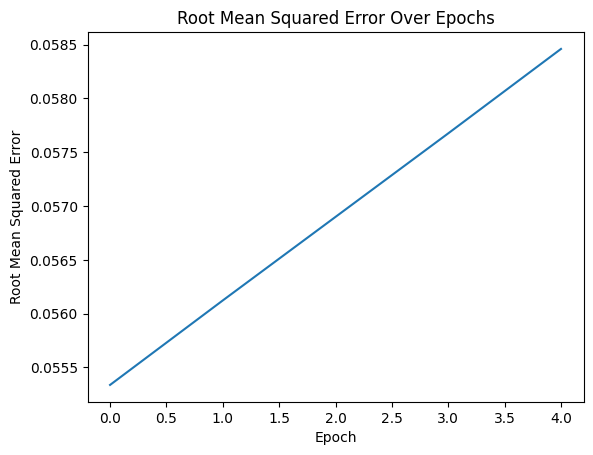

In [70]:
# Function to get embeddings for a given string using the corresponding model
def get_embedding(model, string):
    return model.layers[1](model.layers[0](string))


# Function to get recommendations based on multiple keywords and category
def get_recommendations(model, user_id, keywords, category=None, top_k=5):
    # Get embeddings for each keyword
    keyword_embeddings = [
        get_embedding(description_model, np.array([kw])) for kw in keywords
    ]

    # Calculate average embedding for keywords
    avg_keyword_embedding = tf.reduce_mean(keyword_embeddings, axis=0)

    # Get all place embeddings
    all_place_embeddings = get_embedding(place_model, merged_df["Place_name"].unique())

    # Filter places based on category (if provided)
    if category is not None:
        filtered_places = merged_df[merged_df["label"] == category][
            "Place_name"
        ].unique()
        all_place_embeddings = get_embedding(place_model, filtered_places)

    # Calculate cosine similarity between average keyword embedding and filtered place embeddings
    similarities = tf.matmul(all_place_embeddings, tf.transpose(avg_keyword_embedding))

    # Get indices of top-k places with highest similarity
    top_indices = tf.argsort(similarities[:, 0], direction="DESCENDING")[:top_k]

    # Get recommended places and corresponding user_ids
    recommended_places = (
        filtered_places[top_indices]
        if category is not None
        else merged_df["Place_name"].unique()[top_indices]
    )
    user_ids = [user_id] * top_k

    return recommended_places, user_ids


# Example usage with multiple keywords and category filter
user_id = "123"  # Replace with the desired user_id
keywords = [
    "White Sand Beach",
    "Waterfall",
    "Family water tourism",
]  # Replace with the desired keywords
category = "water activities"  # Replace with the desired category

recommendations, user_ids = get_recommendations(model, user_id, keywords, category)

# Print recommendations
print(
    f"Rekomendasi Tempat untuk Pengguna dengan ID {user_id}, Kata Kunci '{keywords}', dan Kategori {category}:"
)
for i, place_name in enumerate(recommendations, start=1):
    print(f"{i}. {place_name}")

Rekomendasi Tempat untuk Pengguna dengan ID 123, Kata Kunci '['White Sand Beach', 'Waterfall', 'Family water tourism']', dan Kategori water activities:
1. Marina Beach
2. Parangtritis Beach
3. Progo rafting
4. Panjang Island
5. Goa Cemara Beach


In [2]:
loaded_model = tf.keras.models.load_model("recommender_model_savedmodel")


def get_embedding(model, string):
    return model.layers[1](model.layers[0](string))


# Function to get recommendations based on multiple keywords and category
def get_recommendations(model, user_id, keywords, category=None, top_k=5):
    user_model = model.user_model
    place_model = model.place_model
    description_model = model.description_model

    # Get embeddings for each keyword
    keyword_embeddings = [
        get_embedding(description_model, np.array([kw])) for kw in keywords
    ]

    # Calculate average embedding for keywords
    avg_keyword_embedding = tf.reduce_mean(keyword_embeddings, axis=0)

    # Get all place embeddings
    all_place_embeddings = get_embedding(place_model, merged_df["Place_name"].unique())

    # Filter places based on category (if provided)
    if category is not None:
        filtered_places = merged_df[merged_df["label"] == category][
            "Place_name"
        ].unique()
        all_place_embeddings = get_embedding(place_model, filtered_places)

    # Calculate cosine similarity between average keyword embedding and filtered place embeddings
    similarities = tf.matmul(all_place_embeddings, tf.transpose(avg_keyword_embedding))

    # Get indices of top-k places with highest similarity
    top_indices = tf.argsort(similarities[:, 0], direction="DESCENDING")[:top_k]

    # Get recommended places and corresponding user_ids
    recommended_places = (
        filtered_places[top_indices]
        if category is not None
        else merged_df["Place_name"].unique()[top_indices]
    )
    user_ids = [user_id] * top_k

    return recommended_places, user_ids


# Example usage with multiple keywords and category filter
user_id = "123"  # Replace with the desired user_id
keywords = [
    "White Sand Beach",
    "Waterfall",
    "Family water tourism",
]  # Replace with the desired keywords
category = "hiking"  # Replace with the desired category

recommendations, user_ids = get_recommendations(
    loaded_model, user_id, keywords, category
)

# Print recommendations
print(
    f"Rekomendasi Tempat untuk Pengguna dengan ID {user_id}, Kata Kunci '{keywords}', dan Kategori {category}:"
)
for i, place_name in enumerate(recommendations, start=1):
    print(f"{i}. {place_name}")

Rekomendasi Tempat untuk Pengguna dengan ID 123, Kata Kunci '['White Sand Beach', 'Waterfall', 'Family water tourism']', dan Kategori hiking:
1. Bukit Bintang Yogyakarta
2. Pengger Pine Forest
3. Becici Pine Peak
4. Mongkrang Hill
5. Sepikul Mountain
